**<font size=3>GOAL**

    The dataset id about whether or not different consumers made a purchase in response to a test mailing of a certain catalog and, in case of a purchase, how much money each consumer spent. 

**<font size=3>Stage 1**    
    
    Build numeric prediction models that predict Spending based on the other available customer information.

**<font size=3>Stage 2**    
    
    Create a separate “restricted” dataset (i.e., a subset of the original dataset), which includes only purchase records (i.e., where Purchase = 1). Build numeric prediction models to predict Spending for this restricted dataset.


**<font size=3>Variable Description**
   Variable Name	Description	Variable Type	Code Description
- 1.  US           --     a US address?	(binary, 1/0)
- 2-16 Source_*	    --      Source catalog for the record	(binary, 1/0)
- 17.	Freq.	    --          Number of transactions in last year at source catalog	(numeric)	
- 18. last_update_days_ago --  How many days ago was last update to cust. record (numeric)	
- 19. 1st_update_days_ago	--  How many days ago was 1st update to cust. record	(numeric)	
- 20.	Web_order	       --   Customer placed at least 1 order via web	(binary, 1/0)
- 21.	Gender=male	      --    Customer is male	(binary, 1/0)
- 22.	Address_is_res	  --    Address is a residence	binary	(binary, 1/0)
- 23.	Purchase	      --    Person made purchase in test mailing	(binary, 1/0)
- 24.	Spending	      --    Amount spent by customer in test mailing ($)	(numeric)	

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('HW3.csv')
df.drop('sequence_number', axis=1, inplace=True)

In [3]:
df.head()

,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,source_r,...,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending
0,1,0,0,1,0,0,0,0,0,0,...,0,0,2,3662,3662,1,0,1,1,127.87
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,2900,2900,1,1,0,0,0.00
2,1,0,0,0,0,0,0,0,0,0,...,0,0,2,3883,3914,0,0,0,1,127.48
3,1,0,1,0,0,0,0,0,0,0,...,0,0,1,829,829,0,1,0,0,0.00
4,1,0,1,0,0,0,0,0,0,0,...,0,0,1,869,869,0,0,0,0,0.00


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
US,2000.0,0.824500,0.380489,0.0,1.00,1.000,1.0000,1.00
source_a,2000.0,0.126500,0.332495,0.0,0.00,0.000,0.0000,1.00
source_c,2000.0,0.056000,0.229979,0.0,0.00,0.000,0.0000,1.00
source_b,2000.0,0.060000,0.237546,0.0,0.00,0.000,0.0000,1.00
source_d,2000.0,0.041500,0.199493,0.0,0.00,0.000,0.0000,1.00
source_e,2000.0,0.151000,0.358138,0.0,0.00,0.000,0.0000,1.00
source_m,2000.0,0.016500,0.127420,0.0,0.00,0.000,0.0000,1.00
source_o,2000.0,0.033500,0.179983,0.0,0.00,0.000,0.0000,1.00
source_h,2000.0,0.052500,0.223089,0.0,0.00,0.000,0.0000,1.00
source_r,2000.0,0.068500,0.252665,0.0,0.00,0.000,0.0000,1.00


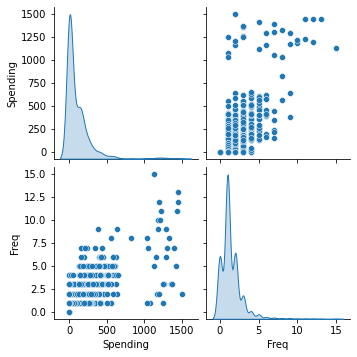

In [5]:
sns.pairplot(df[['Spending', 'Freq']], diag_kind='kde')

In [6]:
#sns.pairplot(df, diag_kind='kde')

In [7]:
df.columns

Index(['US', 'source_a', 'source_c', 'source_b', 'source_d', 'source_e',
       'source_m', 'source_o', 'source_h', 'source_r', 'source_s', 'source_t',
       'source_u', 'source_p', 'source_x', 'source_w', 'Freq',
       'last_update_days_ago', '1st_update_days_ago', 'Web order',
       'Gender=male', 'Address_is_res', 'Purchase', 'Spending'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   US                    2000 non-null   int64  
 1   source_a              2000 non-null   int64  
 2   source_c              2000 non-null   int64  
 3   source_b              2000 non-null   int64  
 4   source_d              2000 non-null   int64  
 5   source_e              2000 non-null   int64  
 6   source_m              2000 non-null   int64  
 7   source_o              2000 non-null   int64  
 8   source_h              2000 non-null   int64  
 9   source_r              2000 non-null   int64  
 10  source_s              2000 non-null   int64  
 11  source_t              2000 non-null   int64  
 12  source_u              2000 non-null   int64  
 13  source_p              2000 non-null   int64  
 14  source_x              2000 non-null   int64  
 15  source_w             

# Stage 1

In [9]:
target = ['Spending']
features = ['US', 'source_a', 'source_c', 'source_b', 'source_d', 'source_e',
       'source_m', 'source_o', 'source_h', 'source_r', 'source_s', 'source_t',
       'source_u', 'source_p', 'source_x', 'source_w', 'Freq',
       'last_update_days_ago', '1st_update_days_ago', 'Web order',
       'Gender=male', 'Address_is_res']

In [10]:
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [12]:
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
def RMSE(y_true,y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    #print ('RMSE: %2.3f' % rmse)
    return rmse

def two_scorer():
    return make_scorer(RMSE, greater_is_better=False)

## LinearRegression

In [13]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
reg_score = cross_val_score(reg, X, y, cv=5, scoring=two_scorer())

In [14]:
test_results = {}
test_results['Linear Regression'] = -np.mean(reg_score)
print('Linear Regression model RMSE: %2.2f' %-np.mean(reg_score))

Linear Regression model RMSE: 126.83


## KNN

In [15]:
from sklearn.neighbors import KNeighborsRegressor

param_grid = {'n_neighbors':[3, 5, 8]}
neigh = KNeighborsRegressor()
knn_clf = GridSearchCV(neigh, param_grid, cv=5, scoring=two_scorer())
knn_score = knn_clf.fit(X_scaled, y)

print('best params: ', knn_score.best_params_)
# Mean cross-validated score of the best_estimator
test_results['KNN'] = -knn_score.best_score_
print('KNN model RMSE: %2.2f' %-knn_score.best_score_)

best params:  {'n_neighbors': 8}
KNN model RMSE: 165.90


## DecisionTree

In [16]:
from sklearn.tree import DecisionTreeRegressor

param_grid = {'max_depth':[5, 10], 'min_samples_split':[2, 5, 8]}
regressor = DecisionTreeRegressor()
dt_clf = GridSearchCV(regressor, param_grid, cv=5, scoring=two_scorer())
dt_score = dt_clf.fit(X, y)

print('best params: ', dt_score.best_params_)
test_results['Decision Tree'] = -dt_score.best_score_
print('Decision tree model RMSE: %2.2f' %-dt_score.best_score_)

best params:  {'max_depth': 5, 'min_samples_split': 5}
Decision tree model RMSE: 129.78


## SVM Regression

In [17]:
svr = SVR()
svm_grid = {'kernel':['rbf'],'C':[100,200],'gamma':[.05,.1,.5]} 
svr_clf = GridSearchCV(svr, svm_grid, cv=5, scoring=two_scorer())
svr_score = svr_clf.fit(X_scaled, y)

print('best params: ', svr_score.best_params_)
test_results['SVM'] = -svr_score.best_score_
print('SVM model RMSE: %2.2f' %-svr_score.best_score_)

best params:  {'C': 200, 'gamma': 0.5, 'kernel': 'rbf'}
SVM model RMSE: 139.82


## Neural Network

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical
import keras_tuner as kt

# https://www.tensorflow.org/tutorials/keras/regression

In [19]:
train_dataset = df.sample(frac=0.8, random_state=0)
test_dataset = df.drop(train_dataset.index)

train_dataset.drop('Purchase', axis=1, inplace=True)
test_dataset.drop('Purchase', axis=1, inplace=True)

train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Spending')
test_labels = test_features.pop('Spending')

In [20]:
# The Normalization layer
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())

2022-03-16 16:26:10.371984: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-16 16:26:10.406721: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


[[8.2187498e-01 1.2937501e-01 5.5625007e-02 6.3124999e-02 4.1250002e-02
  1.5124997e-01 1.6249999e-02 3.3749998e-02 5.1250007e-02 6.7499995e-02
  4.3125000e-02 2.0000000e-02 1.1937499e-01 5.0000004e-03 1.8125003e-02
  1.3937500e-01 1.4112499e+00 2.1738855e+03 2.4526306e+03 4.2062503e-01
  5.1937497e-01 2.2312501e-01]]


### Linear regression

In [21]:
from tensorflow.keras import backend as K
def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(mean_squared_error(y_true, y_pred))

In [22]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [23]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_squared_error',
    metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')])

In [24]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 4.73 s, sys: 655 ms, total: 5.38 s
Wall time: 3.94 s


In [25]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)

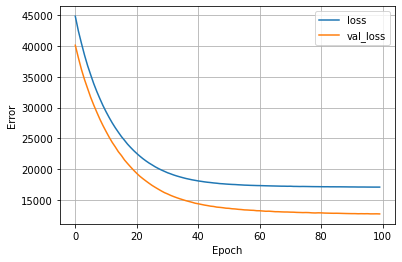

In [26]:
plot_loss(history)

In [27]:
test_results['Linear Neural Network'] = linear_model.evaluate(test_features, test_labels, verbose=0)[1]
test_results['Linear Neural Network']

126.61321258544922

### Regression using a DNN

In [28]:
import keras_tuner as kt

In [29]:
def build_and_compile_model(norm):
    model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
    ])
    
    #hp_learning_rate = norm.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  loss='mean_squared_error', 
                  metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')])
    
    return model

In [30]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 22)                45        
_________________________________________________________________
dense_1 (Dense)              (None, 64)                1472      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 5,742
Trainable params: 5,697
Non-trainable params: 45
_________________________________________________________________


In [31]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 5.96 s, sys: 908 ms, total: 6.87 s
Wall time: 4.51 s


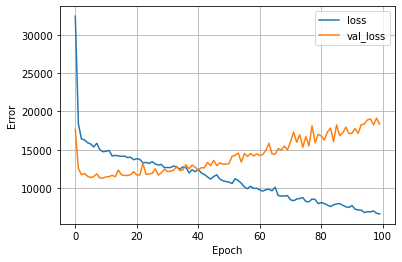

In [32]:
plot_loss(history)

In [33]:
test_results['Deep Neural Network'] = dnn_model.evaluate(test_features, test_labels, verbose=0)[1]
test_results['Deep Neural Network']

165.33480834960938

### Keras Tuning

In [34]:
# https://keras.io/keras_tuner/
# https://www.tensorflow.org/tutorials/keras/keras_tuner
import keras_tuner as kt

In [35]:
X = df[features]
y = df[target]

train_features = X_scaled.sample(frac=0.8, random_state=0)
test_features = X_scaled.drop(train_features.index)

train_labels = y.iloc[train_features.index]
test_labels = y.iloc[test_features.index]

In [36]:
def build_model(hp):
    model = keras.Sequential()
    
    # Tune the number of units in the first Dense layer
    # Choose an optimal value between 32-512
    hp_units = hp.Int('units', min_value=10, max_value=100, step=10)
    model.add(keras.layers.Dense(units=hp_units, activation='relu', input_dim=22))
    #model.add(tf.keras.layers.Dropout(0.2))
    model.add(keras.layers.Dense(units=hp_units, activation='relu'))
    model.add(keras.layers.Dense(1,  kernel_initializer='normal'))
    
    # Tune the learning rate for the optimizer
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='mse', 
                  metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')])
    
    return model

In [37]:
tuner = kt.RandomSearch(build_model,
                        objective='val_loss',
                        #objective= Objective("val_rmse", direction="min"),
                        max_trials=3,
                        overwrite=True,
                        #executions_per_trial=3
                       )

In [38]:
#stop_early = tf.keras.callbacks.EarlyStopping(monitor='mse', patience=5)

In [39]:
tuner.search(train_features, train_labels, epochs=200, validation_split=0.2
             #, callbacks=[stop_early]
            )

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters()[0]

Trial 3 Complete [00h 00m 33s]
val_loss: 11100.4033203125

Best val_loss So Far: 11100.4033203125
Total elapsed time: 00h 01m 38s
INFO:tensorflow:Oracle triggered exit


In [40]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
units: 30
learning_rate: 0.001
Score: 11100.4033203125
Trial summary
Hyperparameters:
units: 20
learning_rate: 0.001
Score: 11269.2841796875
Trial summary
Hyperparameters:
units: 20
learning_rate: 0.0001
Score: 29455.259765625


In [41]:
print('The optimal number of units in the first densely-connectedlayer is')
print(best_hps.get('units'))
print('the optimal learning rate for the optimizeris ')
print(best_hps.get('learning_rate'))

The optimal number of units in the first densely-connectedlayer is
30
the optimal learning rate for the optimizeris 
0.001


In [42]:
# Train the model
# Find the optimal number of epochs to train the model with the hyperparameters obtained from the search.
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
%time
model = tuner.hypermodel.build(best_hps)
history = model.fit(train_features, train_labels, epochs=50, validation_split=0.2)

val_acc_per_epoch = history.history['rmse']
best_epoch = val_acc_per_epoch.index(min(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.01 µs
Epoch 1/50
40/40 [==============================] - 0s 3ms/step - loss: 45889.5703 - rmse: 214.2185 - val_loss: 42105.2578 - val_rmse: 205.1957
Epoch 2/50
40/40 [==============================] - 0s 2ms/step - loss: 45521.3359 - rmse: 213.3573 - val_loss: 41405.3242 - val_rmse: 203.4830
Epoch 3/50
40/40 [==============================] - 0s 2ms/step - loss: 44071.3750 - rmse: 209.9318 - val_loss: 39070.3555 - val_rmse: 197.6622
Epoch 4/50
40/40 [==============================] - 0s 2ms/step - loss: 40645.7539 - rmse: 201.6079 - val_loss: 35126.5234 - val_rmse: 187.4207
Epoch 5/50
40/40 [==============================] - 0s 1ms/step - loss: 36641.1641 - rmse: 191.4188 - val_loss: 32384.4414 - val_rmse: 179.9568
Epoch 6/50
40/40 [==============================] - 0s 1ms/step - loss: 34628.0391 - rmse: 186.0861 - val_loss: 31725.2285 - val_rmse: 178.1158
Epoch 7/50
40/40 [==============================] - 0s 1ms/step - lo

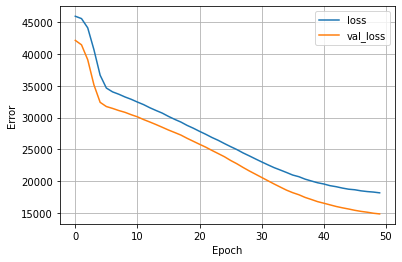

In [43]:
plot_loss(history)

In [44]:
eval_result = model.evaluate(test_features, test_labels)
print("RMSE", eval_result[1])

13/13 [==============================] - 0s 1ms/step - loss: 19030.9707 - rmse: 137.9528
RMSE 137.95278930664062


In [45]:
test_results['Deep Neural Network- tuner'] = eval_result[1]

## XGBoost

In [46]:
import xgboost as xgb

xgb = xgb.XGBRegressor()
xgb_grid = {'max_depth':[3, 6, 8],'learning_rate':[0.05, 0.1, 0.2]}
xgb_clf = GridSearchCV(xgb, xgb_grid, cv=5, scoring=two_scorer())
xgb_score = xgb_clf.fit(X_scaled, y)

print('best params: ', xgb_score.best_params_)
test_results['XGBoost_model'] = -xgb_score.best_score_
print('XGBoost model RMSE: %2.2f' %-xgb_score.best_score_)

best params:  {'learning_rate': 0.1, 'max_depth': 3}
XGBoost model RMSE: 121.89


## Model Peformance Evaluation

In [47]:
test_results_df = pd.DataFrame(list(test_results.items()), 
                               columns=['Model', 'RMSE']).sort_values('RMSE')

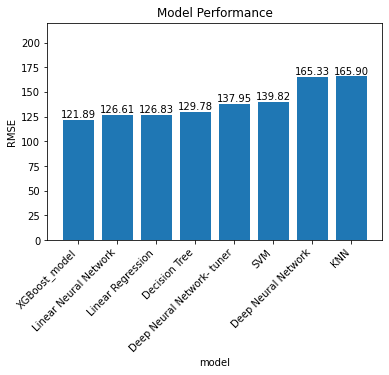

In [48]:
x = test_results_df['Model']
y = test_results_df['RMSE']

fig,ax = plt.subplots()
plt.bar(x, y)
ax.set_xticklabels(x, rotation=45, ha='right')
plt.xlabel('model')
plt.ylabel('RMSE')
plt.ylim(0, 220)
plt.title('Model Performance')

for a,b in zip(x,y):
    plt.text(a, b+0.05, '%2.2f' % b, ha='center', va= 'bottom',fontsize=10)

# Stage 2

In [49]:
df_p = df[df['Purchase']==1]

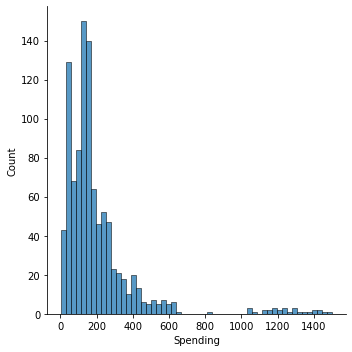

In [50]:
sns.displot(df_p['Spending'])

In [51]:
target = ['Spending']
features = ['US', 'source_a', 'source_c', 'source_b', 'source_d', 'source_e',
       'source_m', 'source_o', 'source_h', 'source_r', 'source_s', 'source_t',
       'source_u', 'source_p', 'source_x', 'source_w', 'Freq',
       'last_update_days_ago', '1st_update_days_ago', 'Web order',
       'Gender=male', 'Address_is_res']

In [52]:
X = df_p[features]
y = df_p[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [53]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

## Nested CV

In [54]:
i = 42
inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)
scoring = two_scorer()

In [55]:
dt = DecisionTreeRegressor()
dt_grid = {'max_depth':list(range(2,10)), 'min_samples_leaf':list(range(1,5))}
lr = LinearRegression()
lr_grid = {}
knn =  KNeighborsRegressor()
knn_grid = {'n_neighbors':list(range(2,5))}
svm = SVR()
svm_grid = {'kernel':['rbf'],'C':[1,10,100],'gamma':[.1,.5,1]} 

import xgboost as xgb
xgb = xgb.XGBRegressor()
xgb_grid = {'max_depth':[3,6,9],'learning_rate':[0.05,0.1,0.2]}

In [56]:
dt_clf = GridSearchCV(estimator=dt, param_grid=dt_grid, scoring = scoring, cv=inner_cv)
lr_clf = GridSearchCV(estimator=lr, param_grid=lr_grid, scoring = scoring, cv=inner_cv)
knn_clf = GridSearchCV(estimator=knn, param_grid=knn_grid, scoring = scoring, cv=inner_cv)
svm_clf = GridSearchCV(estimator=svm, param_grid=svm_grid, scoring = scoring, cv=inner_cv)
xgb_clf = GridSearchCV(estimator=xgb, param_grid=xgb_grid, scoring = scoring, cv=inner_cv)

In [57]:
dt_score = cross_val_score(dt_clf, X=X, y=y, cv=outer_cv)
lr_score = cross_val_score(lr_clf, X=X, y=y, cv=outer_cv)
knn_score = cross_val_score(knn_clf, X=X_scaled, y=y, cv=outer_cv)
svm_score = cross_val_score(svm_clf, X=X_scaled, y=y, cv=outer_cv)
xgb_score = cross_val_score(xgb_clf, X=X_scaled, y=y, cv=outer_cv)

In [58]:
score = {}
score['dt'] = -dt_score.mean()
score['lr'] = -lr_score.mean()
score['knn'] = -knn_score.mean()
score['svm'] = -svm_score.mean()
score['xgb'] = -xgb_score.mean()
score

{'dt': 179.91559838666933,
 'lr': 165.01458044073365,
 'knn': 212.36770618903782,
 'svm': 190.07156883219045,
 'xgb': 160.9016447845745}

In [59]:
train_features = X_scaled.sample(frac=0.8, random_state=0)
test_features = X_scaled.drop(train_features.index)

train_labels = y.iloc[train_features.index]
test_labels = y.iloc[test_features.index]

In [60]:
def build_model(hp):
    model = keras.Sequential()
    
    # Tune the number of units in the first Dense layer
    # Choose an optimal value between 32-512
    hp_units = hp.Int('units', min_value=10, max_value=100, step=10)
    model.add(keras.layers.Dense(units=hp_units, activation='relu', input_dim=22))
    #model.add(tf.keras.layers.Dropout(0.2))
    model.add(keras.layers.Dense(units=hp_units, activation='relu'))
    model.add(keras.layers.Dense(1,  kernel_initializer='normal'))
    
    # Tune the learning rate for the optimizer
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='mse', 
                  metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')])
    
    return model

tuner = kt.RandomSearch(build_model,
                        objective='val_loss',
                        max_trials=3,
                        overwrite=True,
                       )

tuner.search(train_features, train_labels, epochs=200, validation_data=(test_features, test_labels))

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters()[0]

print('The optimal number of units in the first densely-connectedlayer is')
print(best_hps.get('units'))
print('the optimal learning rate for the optimizeris ')
print(best_hps.get('learning_rate'))

Trial 3 Complete [00h 00m 30s]
val_loss: 48884.10546875

Best val_loss So Far: 22002.44921875
Total elapsed time: 00h 01m 24s
INFO:tensorflow:Oracle triggered exit
The optimal number of units in the first densely-connectedlayer is
80
the optimal learning rate for the optimizeris 
0.001


In [61]:
import math
score['NN'] = math.sqrt(22043.51953125)

## Model Performance Evaluation

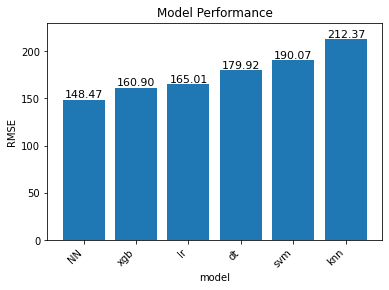

In [62]:
score_df = pd.DataFrame(list(score.items()), 
                               columns=['Model', 'RMSE']).sort_values('RMSE')

x = score_df['Model']
y = score_df['RMSE']

fig,ax = plt.subplots()
plt.bar(x, y)
ax.set_xticklabels(x, rotation=45, ha='right')
plt.xlabel('model')
plt.ylabel('RMSE')
plt.ylim(0, 230)
plt.title('Model Performance')

for a,b in zip(x,y):
    plt.text(a, b+0.05, '%2.2f' % b, ha='center', va= 'bottom',fontsize=11)

# Compare models

For stage 1, XGBoost model gets the best results, with RMSE 121.89.

For stage 2, neural network gets the best results, with RMSE 148.47.

In general, model performances drop in task B. I believe the reason is because those who do not purchase and spend 0 dollars have very similar characterics and are easily to predict. On the other hand, those who do purchase and spend more than 0 dollar have very diverse traits.